**Multiple Linear Regression With Vectorization**

In [1]:
import copy
import math
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./Datasets/possum.csv")
df = df.dropna().reset_index(drop=True)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
X = df[df.columns[5:]]
Y = df[df.columns[4]]

split = math.floor(0.9*X.shape[0])

x = X[split:].to_numpy()
y = Y[split:].to_numpy()
X = X[:split].to_numpy()
Y = Y[:split].to_numpy()

In [6]:
"""
Zscore normalization: (xi - mu) / sigma.
"""
def scale(xi, mu, sigma):
    return (xi-mu)/sigma

def normalize(nparr):
    mu = nparr.mean(axis=0)
    sigma = nparr.std(axis=0)
    return mu, sigma, (nparr-mu)/sigma

In [7]:
"""f(w, b, x) = dot(w, x) + b"""
def f(w, b, x):
    return np.dot(w, x) + b

"""Squared Error Cost Function"""
def j(w, b, X, Y):
    cost = 0
    n =  X.shape[0]
    for i in range(n):
        cost += (f(w, b, X[i]) - Y[i])**2
    return cost/(2*n)

In [8]:
"""Gradient Calculator"""
def gradient(w, b, X, Y):
    n, m = X.shape
    dj_dw, dj_db = np.zeros(m), 0
    for i in range(n):
        err = f(w, b, X[i]) - Y[i]
        for j in range(m):
            dj_dw[j] += err*X[i, j]
        dj_db += err
    
    dj_dw /= n
    dj_db /= n

    return dj_dw, dj_db

"Gradient Descent Algorithm"
def gradient_descent(a, X, Y, epsilon=1e-6, maxiter=1000000):
    n, m = X.shape

    w, b = np.zeros(m), 0
    prev_cost = j(w, b, X, Y)
    cost_hist = [prev_cost, ]
    format = '{:10} {:10}'
    print(format.format("Iteration", "Cost"))
    for i in range(maxiter):
        dj_dw, dj_db = gradient(w, b, X, Y)

        w -= a*dj_dw
        b -= a*dj_db


        cost = j(w, b, X, Y)

        if (i % 1000 == 0):
            print(format.format(i, cost))
            cost_hist.append(cost)

        if ((prev_cost - cost) < epsilon):
            break
        prev_cost = cost


    return (w, b), cost_hist

In [9]:
(w, b), cost_hist = gradient_descent(1e-6, X, Y)

print(f"{w = }")
print(f"{b = }")

Iteration  Cost      
         0 8.754472117778931
      1000 1.761275795677278
      2000 1.7592144899066553
      3000 1.7572018306642891
      4000 1.755235893279677
      5000 1.7533148453750975
      6000 1.7514369422195257
      7000 1.7496005223190114
      8000 1.7478040032315072
      9000 1.746045877594626
     10000 1.744324709355528
     11000 1.7426391301925952
     12000 1.7409878361190885
     13000 1.7393695842595507
     14000 1.7377831897900977
     15000 1.7362275230342596
     16000 1.7347015067064393
     17000 1.733204113295446
     18000 1.7317343625809574
     19000 1.7302913192761509
     20000 1.7288740907900522
     21000 1.7274818251034874
     22000 1.7261137087528677
     23000 1.724768964916298
     24000 1.7234468515967778
     25000 1.7221466598975625
     26000 1.7208677123849914
     27000 1.7196093615342856
     28000 1.7183709882541371
     29000 1.71715200048603
     30000 1.715951831874508
     31000 1.7147699405047745
     32000 1.713605807704160

In [10]:
mu, sigma, X_norm = normalize(X)
(wn, bn), J_histn = gradient_descent(1e-3, X_norm, Y)

print(f"{wn = }")
print(f"{bn = }")

Iteration  Cost      
         0 9.177453440832409
      1000 2.5044977075198553
      2000 1.6268350838726178
      3000 1.5016874452931483
      4000 1.4807613282227854
      5000 1.475215312571281
      6000 1.4725235818791684
      7000 1.4707342294810253
      8000 1.4694321342096137
wn = array([ 0.13833249, -0.00467534, -0.06611841,  0.17250718, -0.23207028,
        0.36486014,  0.35886242,  0.25914034,  0.41826306])
bn = np.float64(3.8324602325375756)


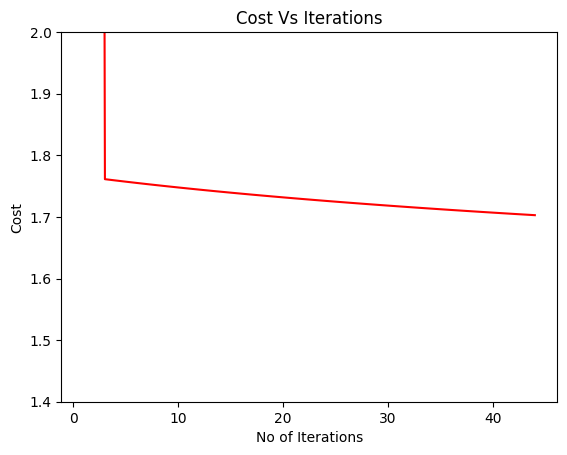

In [11]:
plt.plot(range(1, len(cost_hist)+1), cost_hist, c="r")
plt.ylim(1.4, 2)
plt.title("Cost Vs Iterations")
plt.xlabel("No of Iterations")
plt.ylabel("Cost")
plt.show()

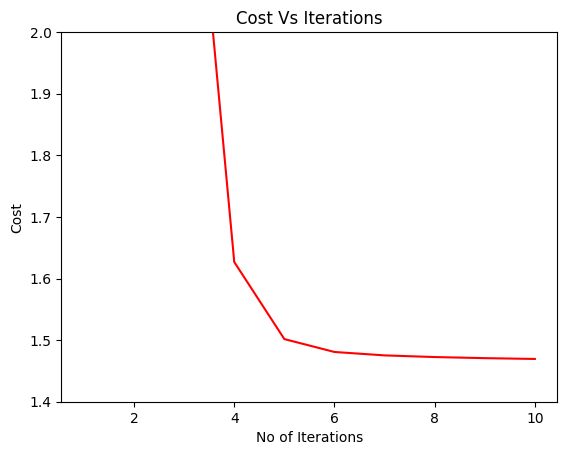

In [12]:
plt.plot(range(1, len(J_histn)+1), J_histn, c="r")
plt.ylim(1.4, 2)
plt.title("Cost Vs Iterations")
plt.xlabel("No of Iterations")
plt.ylabel("Cost")
plt.show()

In [14]:
print(j(w, b, x, y))
print(j(wn, bn, scale(x, mu, sigma), y))

1.413926364664703
1.5986502591854335
